## Dataset preparation from online

In [3]:
from google_images_download import google_images_download
import os
original_path = os.getcwd()
data_path = os.path.join(original_path,'downloads')

In [4]:
response = google_images_download.googleimagesdownload()
search_queries = ['happy dogs','smiling dogs','sad dogs','frown dogs']

In [3]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    chromedriver='C:\\Users\\sungsooc\\Documents\\chromedriver_win32\\chromedriver.exe', 
                    silent_mode=True)
    try: 
        response.download(arguments)     
    except FileNotFoundError:  
        arguments = dict(keywords=query,
                    limit=20,
                    format='jpg',
                    print_urls=True)                       
        try:  
            response.download(arguments)  
        except: 
            pass

In [4]:
download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 687 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 569 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 613 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 617 is all we got for this search filter!
Downloaded 686 happy dogs images!
Downloaded 569 smiling dogs images!
Downloaded 607 sad dogs images!
Downloaded 594 depressed dogs images!


#### NOTE: at this stage, manually go over the downloaded files to get rid of "bad" images; this does not necessarily have to be thorough. 

### Processing into two categories

In [7]:
import shutil
data_folders = os.listdir(data_path)

source_happy = os.path.join(data_path,'smiling dogs')
dest_happy = os.path.join(data_path,'happy dogs')
source_sad = os.path.join(data_path,'frown dogs')
dest_sad = os.path.join(data_path,'sad dogs')

files_happy = os.listdir(source_happy)
files_sad = os.listdir(source_sad)
for f in files:
        shutil.move(os.path.join(source_happy,f), dest_happy)
for f in files:
        shutil.move(os.path.join(source_sad,f), dest_sad)
        
os.rmdir(os.path.join(data_path,'smiling dogs'))
os.rmdir(os.path.join(data_path,'frown dogs'))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\sungsooc\\Desktop\\SmilingDogDetection\\downloads\\smiling dogs'

### File renaming

In [19]:
for folder in data_folders:
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    current_list = os.listdir(os.getcwd())
    for i in range(len(os.listdir(working_dir))):
        original_name = current_list[i]
        new_name = "".join(folder.split()) + '_{:04d}'.format(i+1) + os.path.splitext(original_name)[-1]
        if not os.path.exists(new_name):
            os.rename(original_name,new_name)
os.chdir(original_path)

## display

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_folders = os.listdir(data_path)

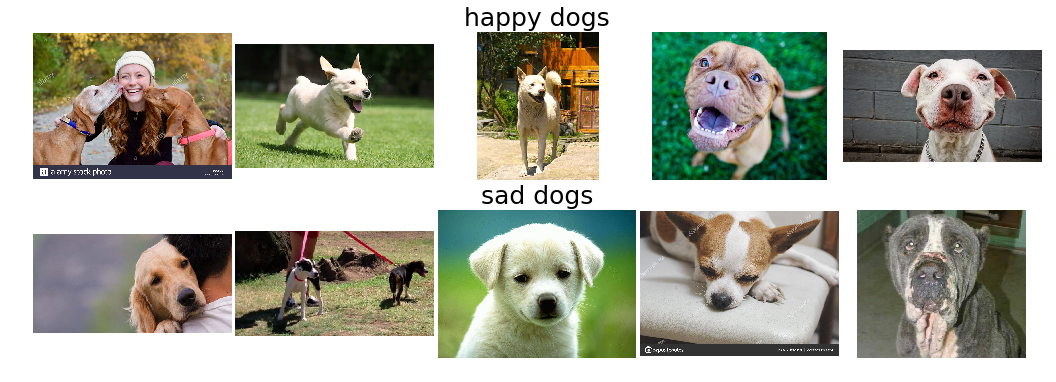

In [7]:
np.random.seed(seed=0)
n_samples = 5
fig, row = plt.subplots(2, n_samples, figsize = (4*n_samples, 3*2))

for col,folder in zip(row,data_folders):
    col[int(np.floor(n_samples/2))].set_title(folder,fontsize=25)
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    for col_ax,img in zip(col,np.random.choice(os.listdir(os.getcwd()),n_samples,replace=False)):
        rand_img = cv2.imread(img)
        rand_img = cv2.cvtColor(rand_img,cv2.COLOR_BGR2RGB)
        col_ax.imshow(rand_img)
        col_ax.axis('off')
plt.subplots_adjust(left=0.2, wspace=0.02)
os.chdir(original_path)

## Load and pre-processing

In [8]:
img_rows = 128
img_cols = 128
img_list = []
label_list = []
labels = dict([('sad dogs',0),('happy dogs',1)])
for folder in data_folders:
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    current_list = os.listdir(os.getcwd())
    for img in current_list:
        img_in = cv2.imread(img,0) # process in gray-scale as color is not important for the goal
        img_in = cv2.resize(img_in,(img_rows,img_cols))
        img_list.append(img_in)
        label_list.append(labels[folder])
os.chdir(original_path)

### normalization

In [9]:
img_data = np.array(img_list).astype('float32')
img_label = np.array(label_list)
img_data /= 255
img_data = np.expand_dims(img_data,axis=3)

In [10]:
print(img_data.shape) #(m,row,col,channel)
print(img_label.shape)

(2414, 128, 128, 1)
(2414,)


## Splitting

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(img_data,img_label,random_state=0)

X_train,X_valid_test,y_train,y_valid_test = train_test_split(X_shuffled,y_shuffled,test_size=0.1,random_state=0,stratify=y_shuffled)
X_valid,X_test,y_valid,y_test = train_test_split(X_valid_test,y_valid_test,test_size=0.5,random_state=0,stratify=y_valid_test)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_valid shape: {}'.format(X_valid.shape))
print('y_valid shape: {}'.format(y_valid.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (2172, 128, 128, 1)
y_train shape: (2172,)
X_valid shape: (121, 128, 128, 1)
y_valid shape: (121,)
X_test shape: (121, 128, 128, 1)
y_test shape: (121,)


## Model building

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Activation,BatchNormalization,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import Adam

Using TensorFlow backend.


In [45]:
%load_ext autoreload
%autoreload 2
import helper_module as hm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
epochs = 350
batch_size = 32
X_input_shape = img_data[0].shape
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',patience=6,verbose=1,factor=0.7,min_lr=0.00001)

### Model #1: arbitrary CNN - initial trial
As an initial model, a simple CNN with 2 conv layers and 1 fc layer is built.

In [38]:
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8, amsgrad=False)
model_1 = Sequential([
    Conv2D(32,(3,3),padding='same',input_shape=X_input_shape),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.5),
    Conv2D(64,(3,3),padding='same'),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.5),

    Flatten(),
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(1),
    Activation('sigmoid')])
model_1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
best_model_path = 'best-wiehgts-model_1-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5'

In [39]:
hm.print_train_num_param(model_1)

Trainable params: 4,213,441


In [41]:
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
hist_1 = model_1.fit(X_train,y_train,
                 epochs=epochs,
                 batch_size=batch_size,
                 verbose=0,
                 validation_data=(X_valid,y_valid),
                 callbacks=[save_best_model,learning_rate_reduction])


Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.00024500001163687554.

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.00017150000203400848.

Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 8.403499814448878e-05.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 5.882449768250808e-05.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 4.117714888707269e-05.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 2.88240029476583e-05.

Epoch 00031: ReduceLROnPlateau reducing learning rate to 2.0176801808702293e-05.

Epoch 00034: ReduceLROnPlateau reducing learning rate to 1.4123761138762347e-05.

Epoch 00037: ReduceLROnPlateau reducing learning rate to 1e-05.


In [50]:
hm.print_valid_test_score(model_1,X_valid,y_valid,X_test,y_test)
hm.training_plot(hist_1) 

121/121 [==============================] - 0s 371us/step
Valid: accuracy = 0.512397  ;  loss = 0.694448
Test: accuracy = 0.487603  ;  loss = 0.700444


NameError: name 'hist_1' is not defined

### Model #2: CNN with a GAP layer - to reduce the degree of overfitting
The first model showed extremely high variance problem. One possible approach to reduce overfitting is to decrease the number of the hyperparameters. By replacing a Flatten layer with a GAP (global average pooling) layer, the number of hyperparameters can be greatly reduced. This may cause underfitting issue, therefore the bottom conv layers need to be adjusted accordingly.

In [ ]:
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8, amsgrad=False)
model_2 = Sequential([
    Conv2D(64,(3,3),padding='same',input_shape=X_input_shape),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    Conv2D(128,(3,3),padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    Conv2D(256,(3,3),padding='same'),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    
    GlobalAveragePooling2D(),
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(64),
    Activation('relu'),
    Dropout(0.5),
    Dense(1),
    Activation('sigmoid')
])
model_2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
best_model_path = 'best-wiehgts-model_2-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5'

In [55]:
hm.print_train_num_param(model_2)

Trainable params: 419,457


In [ ]:
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
hist_2 = model_2.fit(X_train,y_train,
                 epochs=epochs,
                 batch_size=batch_size,
                 verbose=0,
                 validation_data=(X_valid,y_valid),
                 callbacks=[save_best_model,learning_rate_reduction])

In [ ]:
hm.print_valid_test_score(model_2,X_valid,y_valid,X_test,y_test)
hm.training_plot(hist_2) 

In [50]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=45,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)
datagen.fit(X_train)

In [51]:
best_augmented_model_path = 'best-wiehgts-augmented-model_1-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5'
save_best_augmented_model = ModelCheckpoint(best_augmented_model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [56]:
epochs = 350 # augmented model 1
batch_size = 32
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8, amsgrad=False)
augmented_model_1 = Sequential([
            Conv2D(32,(3,3),padding='same',input_shape=X_input_shape),
            BatchNormalization(),
            Activation('relu'),
            MaxPooling2D((2,2)),
            Dropout(0.5),
            Conv2D(64,(3,3),padding='same'),
            Activation('relu'),
            MaxPooling2D((2,2)),
            Dropout(0.5),

            Flatten(),
            Dense(64),
            BatchNormalization(),
            Activation('relu'),
            Dropout(0.5),
            Dense(1),
            Activation('sigmoid')
])
augmented_model_1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
#augmented_model_1.summary()

In [57]:
augmented_hist_1 = augmented_model_1.fit_generator(datagen.flow(X_train,y_train,batch_size=32),
                                               steps_per_epoch = len(X_train)/32,
                                               epochs=epochs,
                                               verbose=0,
                                               validation_data=(X_valid,y_valid),
                                               callbacks=[learning_rate_reduction])


Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.

Epoch 00034: ReduceLROnPlateau reducing learning rate to 0.00024500001163687554.

Epoch 00051: ReduceLROnPlateau reducing learning rate to 0.00017150000203400848.

Epoch 00057: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.

Epoch 00063: ReduceLROnPlateau reducing learning rate to 8.403499814448878e-05.

Epoch 00073: ReduceLROnPlateau reducing learning rate to 5.882449768250808e-05.

Epoch 00079: ReduceLROnPlateau reducing learning rate to 4.117714888707269e-05.

Epoch 00085: ReduceLROnPlateau reducing learning rate to 2.88240029476583e-05.

Epoch 00091: ReduceLROnPlateau reducing learning rate to 2.0176801808702293e-05.

Epoch 00097: ReduceLROnPlateau reducing learning rate to 1.4123761138762347e-05.

Epoch 00103: ReduceLROnPlateau reducing learning rate to 1e-05.


121/121 [==============================] - 0s 371us/step
Dev: accuracy = 0.636364  ;  loss = 0.604912
Test: accuracy = 0.652893  ;  loss = 0.623439


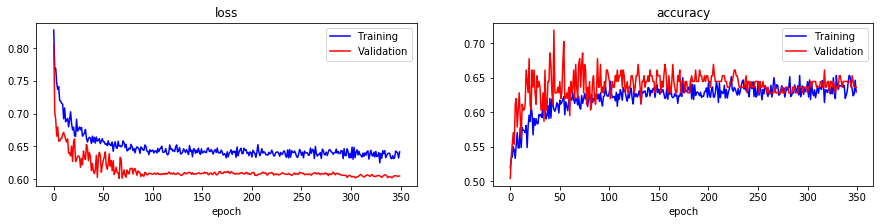

In [58]:
valid_loss, valid_accuracy = augmented_model_1.evaluate(X_valid, y_valid, verbose=1) # 350 epoch
test_loss, test_accuracy = augmented_model_1.evaluate(X_test, y_test, verbose=1)
print("Dev: accuracy = %f  ;  loss = %f" % (valid_accuracy, valid_loss))
print("Test: accuracy = %f  ;  loss = %f" % (test_accuracy, test_loss))
pl.training_plot(augmented_hist_1)

model 1 with augmented data is underfitting

121/121 [==============================] - 0s 676us/step
Dev: accuracy = 0.719008  ;  loss = 0.585466
Test: accuracy = 0.677686  ;  loss = 0.692570


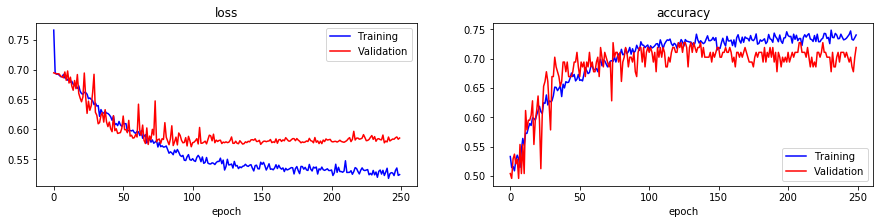

In [23]:
# valid_loss, valid_accuracy = model_3.evaluate(X_valid, y_valid, verbose=1)
# test_loss, test_accuracy = model_3.evaluate(X_test, y_test, verbose=1)
# print("Dev: accuracy = %f  ;  loss = %f" % (valid_accuracy, valid_loss))
# print("Test: accuracy = %f  ;  loss = %f" % (test_accuracy, test_loss))
# pl.training_plot(hist_3) --> now model_2

In [24]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)
datagen.fit(X_train)

In [25]:
epochs = 300
batch_size = 32
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8, amsgrad=False)

augmented_model_2 = Sequential([
            Conv2D(64,(3,3),padding='same',input_shape=X_input_shape),
            Activation('relu'),
            MaxPooling2D((2,2)),
            Conv2D(128,(3,3),padding='same'),
            BatchNormalization(),
            Activation('relu'),
            MaxPooling2D((2,2)),
            Dropout(0.5),
            Conv2D(256,(3,3),padding='same'),
            Activation('relu'),
            MaxPooling2D((2,2)),
            Dropout(0.5),

            GlobalAveragePooling2D(),
            Dense(128),
            Activation('relu'),
            Dense(128),
            Activation('relu'),
            Dense(1),
            Activation('sigmoid')
])

augmented_model_2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
#augmented_model_2.summary()

In [26]:
augmented_hist_2 = augmented_model_2.fit_generator(datagen.flow(X_train,y_train,batch_size=32),
                                               steps_per_epoch = len(X_train)/32,
                                               epochs=epochs,
                                               verbose=0,
                                               validation_data=(X_valid,y_valid),
                                               callbacks=[learning_rate_reduction])


Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.00024500001163687554.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 0.00017150000203400848.

Epoch 00041: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.

Epoch 00052: ReduceLROnPlateau reducing learning rate to 8.403499814448878e-05.

Epoch 00058: ReduceLROnPlateau reducing learning rate to 5.882449768250808e-05.

Epoch 00064: ReduceLROnPlateau reducing learning rate to 4.117714888707269e-05.

Epoch 00076: ReduceLROnPlateau reducing learning rate to 2.88240029476583e-05.

Epoch 00089: ReduceLROnPlateau reducing learning rate to 2.0176801808702293e-05.

Epoch 00095: ReduceLROnPlateau reducing learning rate to 1.4123761138762347e-05.

Epoch 00101: ReduceLROnPlateau reducing learning rate to 1e-05.


121/121 [==============================] - 0s 651us/step
Dev: accuracy = 0.702479  ;  loss = 0.568230
Test: accuracy = 0.644628  ;  loss = 0.657113


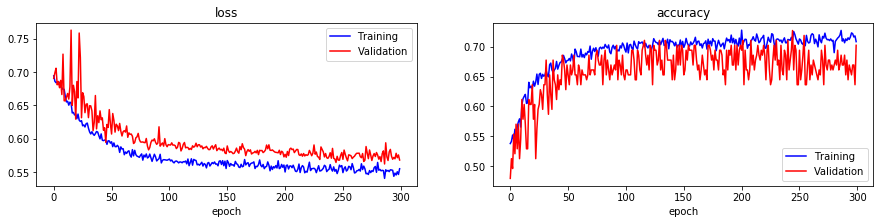

In [27]:
valid_loss, valid_accuracy = augmented_model_2.evaluate(X_valid, y_valid, verbose=1)
test_loss, test_accuracy = augmented_model_2.evaluate(X_test, y_test, verbose=1)
print("Dev: accuracy = %f  ;  loss = %f" % (valid_accuracy, valid_loss))
print("Test: accuracy = %f  ;  loss = %f" % (test_accuracy, test_loss))
pl.training_plot(augmented_hist_2) 

In [29]:
epochs = 350 # more convd layers
batch_size = 32
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8, amsgrad=False)

augmented_model_3 = Sequential([
            Conv2D(64,(3,3),padding='same',input_shape=X_input_shape),
            Activation('relu'),
            Conv2D(64,(3,3),padding='same'),
            Activation('relu'),
            MaxPooling2D((2,2)),
            Conv2D(128,(3,3),padding='same'),
            Activation('relu'),
            Conv2D(128,(3,3),padding='same'),
            BatchNormalization(),
            Activation('relu'),
            MaxPooling2D((2,2)),
            Dropout(0.5),
            Conv2D(256,(3,3),padding='same'),
            Activation('relu'),
            MaxPooling2D((2,2)),
            Dropout(0.5),

            GlobalAveragePooling2D(),
            Dense(128),
            Activation('relu'),
            Dense(128),
            Activation('relu'),
            Dense(1),
            Activation('sigmoid')
])

augmented_model_3.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
augmented_hist_3 = augmented_model_3.fit_generator(datagen.flow(X_train,y_train,batch_size=32),
                                               steps_per_epoch = len(X_train)/32,
                                               epochs=epochs,
                                               verbose=0,
                                               validation_data=(X_valid,y_valid),
                                               callbacks=[learning_rate_reduction])


Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 0.00024500001163687554.

Epoch 00038: ReduceLROnPlateau reducing learning rate to 0.00017150000203400848.

Epoch 00048: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.

Epoch 00054: ReduceLROnPlateau reducing learning rate to 8.403499814448878e-05.

Epoch 00060: ReduceLROnPlateau reducing learning rate to 5.882449768250808e-05.

Epoch 00066: ReduceLROnPlateau reducing learning rate to 4.117714888707269e-05.

Epoch 00072: ReduceLROnPlateau reducing learning rate to 2.88240029476583e-05.

Epoch 00078: ReduceLROnPlateau reducing learning rate to 2.0176801808702293e-05.

Epoch 00084: ReduceLROnPlateau reducing learning rate to 1.4123761138762347e-05.

Epoch 00090: ReduceLROnPlateau reducing learning rate to 1e-05.


121/121 [==============================] - 0s 1ms/step
Dev: accuracy = 0.727273  ;  loss = 0.563880
Test: accuracy = 0.776860  ;  loss = 0.503878


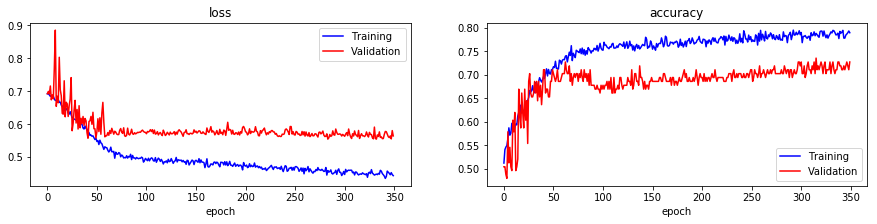

In [31]:
valid_loss, valid_accuracy = augmented_model_3.evaluate(X_valid, y_valid, verbose=1)
test_loss, test_accuracy = augmented_model_3.evaluate(X_test, y_test, verbose=1)
print("Dev: accuracy = %f  ;  loss = %f" % (valid_accuracy, valid_loss))
print("Test: accuracy = %f  ;  loss = %f" % (test_accuracy, test_loss))
pl.training_plot(augmented_hist_3) 

make model more complex with data augmentation

In [ ]:
y_pred = model.predict_classes(X_test)
y_true = y_test
pl.confusion_matrix_plot(y_true,y_pred,'Custom CNN')

In [ ]:
# test_img = cv2.imread('',0)
# test_img = cv2.resize
# =np.array
# =astype
# /255
# check shape
# predict
# predict_classes

In [ ]:

# test_image = cv2.imread('HAM10000_images_part_2/'+new_test_image_id+'.jpg')
# test_image = cv2.resize(test_image,(img_cols,img_rows))
# test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
# test_image_original = test_image.copy()
# test_image_flat = test_image.flatten()
# test_image_flat = scale(test_image_flat)
# test_image =test_image_flat.reshape(1,img_rows,img_cols,img_channels)

# plt.imshow(test_image_original)
# plt.axis('off')
# plt.title('example test image - cell_type_idx: '+str(true_cell_type_idx))
# plt.show()

# test_image_pred = model_2.predict(test_image)
# test_image_pred_classes = np.argmax(test_image_pred,axis=1)
# print('true cell_type_idx: {}'.format(true_cell_type_idx))
# print('predicted cell_type_idx: {}'.format(test_image_pred_classes[0]))

## show mislabeled examples

## make the notebook using image generator

## articles about using flow and flow_from_directory